<a href="https://colab.research.google.com/github/yadav-shivani/RL_cartpole_using_Q_learning/blob/Add_impact_of_discount_rate_on_reward_and_episode_timing/cart_pole_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gym
import time
import math
import matplotlib.pyplot as plt


In [ ]:
env=gym.make('CartPole-v1')
print(env.spec)
#print(env.action_space.n)
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0
Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])
epsilon = 1
epsilon_decay_value = 0.99995

EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [ ]:
def training(env,LEARNING_RATE,DISCOUNT,EPISODES,epsilon,q_table,prior_reward,total_reward,epsilon_decay_value,total):
  episode_reward_array,episode_array,episode_time_array=[],[],[]
  for episode in range(EPISODES + 1): #go through the episodes
      t0 = time.time() #set the initial time
      discrete_state = get_discrete_state(env.reset()) #get the discrete start for the restarted environment
      done = False
      episode_reward = 0 #reward starts as 0 for each episode
      if episode % 1000 == 0:
          print("Episode: " + str(episode))
      while not done:

          if np.random.random() > epsilon:
              action = np.argmax(q_table[discrete_state]) # take co-ordinated action
          else:
              action = np.random.randint(0, env.action_space.n) # do a random action

          new_state, reward, done, _ = env.step(action) # step action to get new states, reward, and the "done" status.

          episode_reward += reward # add the reward

          new_discrete_state = get_discrete_state(new_state)

          # if episode % 2000 == 0: # render
          #     env.render()

          if not done: # update q-table
              max_future_q = np.max(q_table[new_discrete_state])

              current_q = q_table[discrete_state + (action,)]

              new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

              q_table[discrete_state + (action,)] = new_q

          discrete_state = new_discrete_state

      if epsilon > 0.05: # epsilon modification
          if episode_reward > prior_reward and episode > 10000:
              epsilon = math.pow(epsilon_decay_value, episode - 10000)

              if episode % 500 == 0:
                  print("Epsilon: " + str(epsilon))

      t1 = time.time() # episode has finished
      episode_total = t1 - t0 # episode total time
      total = total + episode_total

      total_reward += episode_reward # episode total reward
      prior_reward = episode_reward
      episode_reward_array.extend([episode_reward])
      episode_array.extend([episode])
      episode_time_array.extend([episode_total])
      if episode % 1000 == 0: # every 1000 episodes print the average time and the average reward
          mean = total / 1000
          print("Time Average: " + str(mean))
          total = 0

          mean_reward = total_reward / 1000
          print("Mean Reward: " + str(mean_reward))
          total_reward = 0

  env.close()
  9582242406
  return episode_time_array,episode_reward_array,episode_array

In [ ]:
def plot_discount(episode_array,episode_reward_array,episode_time_array,LEARNING_RATE,DISCOUNT):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(20,6))
  plt.subplot(211)
  plt.plot(episode_array,episode_reward_array)
  plt.title('lr'+str(LEARNING_RATE)+'discount'+str(DISCOUNT))
  plt.xlabel('number of episodes')
  plt.ylabel('Total reward')

  plt.subplot(212)
  plt.plot(episode_array,episode_time_array)
  plt.xlabel('number of episodes')
  plt.ylabel('Time per episode')

#plt.plot(episode_array,episode_time_array)

#Impact of varying DISCOUNT

In [ ]:

DISCOUNT=.95
episode_time_array,episode_reward_array,episode_array=training(env,LEARNING_RATE,DISCOUNT,EPISODES,epsilon,q_table,prior_reward,total_reward,epsilon_decay_value,total)
plot_discount(episode_array,episode_reward_array,episode_time_array,LEARNING_RATE,DISCOUNT)
DISCOUNT=.25
episode_time_array,episode_reward_array,episode_array=training(env,LEARNING_RATE,DISCOUNT,EPISODES,epsilon,q_table,prior_reward,total_reward,epsilon_decay_value,total)
plot_discount(episode_array,episode_reward_array,episode_time_array,LEARNING_RATE,DISCOUNT)

NameError: ignored

#Impact of varying LEARNING RATE
1. With learning rate=.1, reward reaches maximum after 3000 episodes
2. With learning rate=.9, reward reaches maximum value after 40000 episodes
3. With learning rate=.1, time per episode is lower compared to learning rate=.9

<ipython-input-3-0f888f4c50ed>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0
Time Average: 4.299163818359375e-06
Mean Reward: 0.024
Episode: 1000
Time Average: 0.0007225477695465088
Mean Reward: 22.627
Episode: 2000
Time Average: 0.0007032008171081543
Mean Reward: 22.266
Episode: 3000
Time Average: 0.0007608428001403809
Mean Reward: 21.898
Episode: 4000
Time Average: 0.0008255138397216797
Mean Reward: 22.723
Episode: 5000
Time Average: 0.0008536953926086426
Mean Reward: 22.343
Episode: 6000
Time Average: 0.0009595463275909424
Mean Reward: 21.819
Episode: 7000
Time Average: 0.0007172477245330811
Mean Reward: 22.695
Episode: 8000
Time Average: 0.0007673425674438476
Mean Reward: 22.046
Episode: 9000
Time Average: 0.0007150826454162597
Mean Reward: 21.406
Episode: 10000
Time Average: 0.0007120003700256348
Mean Reward: 22.19
Epsilon: 0.9753093024395111
Episode: 11000
Epsilon: 0.9512282354250458
Time Average: 0.0008023355007171631
Mean Reward: 23.843
Episode: 12000
Time Average: 0.0008483185768127442
Mean Reward: 24.919
Epsilon: 0.8824941446941661
Episode:

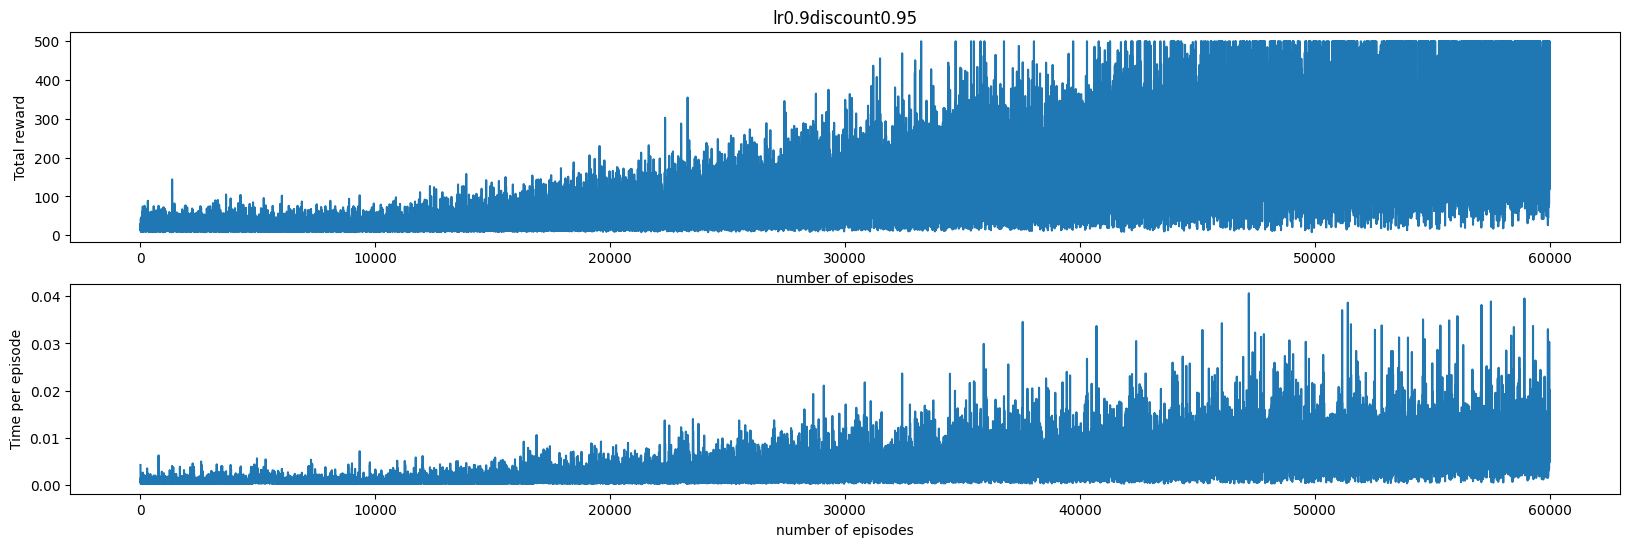

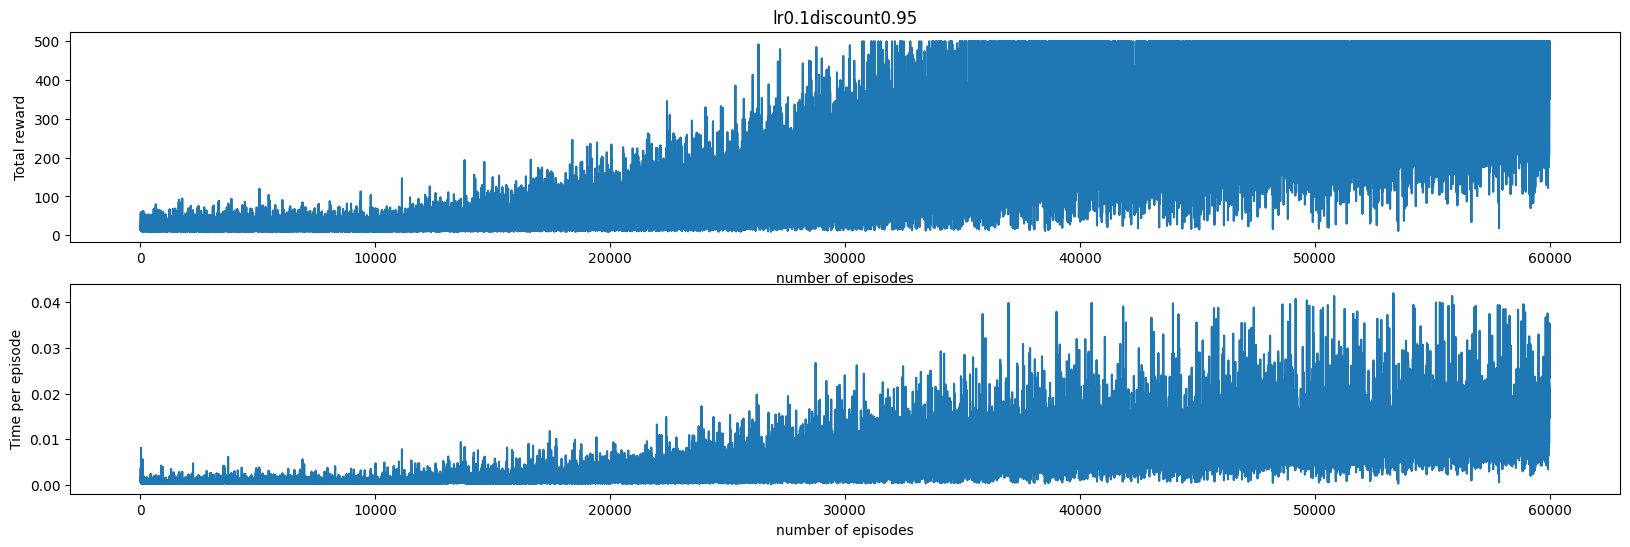

In [ ]:
DISCOUNT=.95
LEARNING_RATE=.9
episode_time_array,episode_reward_array,episode_array=training(env,LEARNING_RATE,DISCOUNT,EPISODES,epsilon,q_table,prior_reward,total_reward,epsilon_decay_value,total)
plot_discount(episode_array,episode_reward_array,episode_time_array,LEARNING_RATE,DISCOUNT)
LEARNING_RATE=.1
episode_time_array,episode_reward_array,episode_array=training(env,LEARNING_RATE,DISCOUNT,EPISODES,epsilon,q_table,prior_reward,total_reward,epsilon_decay_value,total)
plot_discount(episode_array,episode_reward_array,episode_time_array,LEARNING_RATE,DISCOUNT)